##HYPOTHESIS 1
Korhan Köz 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1550)
pd.set_option('display.max_colwidth', 15000)

raw_data=pd.read_csv('community_dataset_with_infection_count.csv')
raw_data.head(5)

,COUNTRY_REGION_CODE,COUNTRY_REGION,DATE_VAL,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
0,AE,United Arab Emirates,15-02-20,1,0,0,4,0,5,0,...,0,8,3,0,NaN,0.000,69030,9395,1666,3.206997
1,AE,United Arab Emirates,16-02-20,2,1,-1,4,0,4,1,...,0,9,4,0,1.0,0.125,71224,10865,1770,3.178328
2,AE,United Arab Emirates,17-02-20,3,-1,2,1,3,5,-1,...,0,9,4,0,0.0,0.000,73258,12583,1868,2.855779
3,AE,United Arab Emirates,18-02-20,4,-2,1,1,0,5,0,...,0,9,4,0,0.0,0.000,75136,14352,2007,2.563543
4,AE,United Arab Emirates,19-02-20,5,-2,0,0,1,4,1,...,0,9,4,0,0.0,0.000,75639,16121,2122,0.669453


In [0]:
Countrynames=np.unique((raw_data['COUNTRY_REGION'])) 
#Uniqe country names, will be used both in new dataframe as a column and will help finding other column values

MobilityMeansList=list()
MobilityMeansList2=list()
CovidConfirmedList=list()
CovidRecoveredList=list()
CovidDeathList=list()
for cname in Countrynames:
  tempdf= raw_data.loc[raw_data['COUNTRY_REGION'] == cname]

  xx=tempdf['RETAIL_AND_RECREATION_PCT'].mean()
  MobilityMeansList.append(xx)

  xx2=tempdf['TRANSIT_STATIONS_PCT'].mean()
  MobilityMeansList2.append(xx2)

  xa=tempdf.loc[tempdf['DAY_CT']==57]
  CovidConfirmedList.append(xa['COVID_CONFIRMED'].sum())

  xb=tempdf.loc[tempdf['DAY_CT']==57]
  CovidRecoveredList.append(xb['COVID_RECOVERED'].sum())

  xc=tempdf.loc[tempdf['DAY_CT']==57]
  CovidDeathList.append(xc['COVID_DEATHS'].sum())


MobilityMeans = np.asarray(MobilityMeansList)  #Mobility trend mean for RER values for each country with the same order as country names array.
MobilityMeans2 = np.asarray(MobilityMeansList2)  #Mobility trend mean values for Transit Stations for each country with the same order as country names array.
CovidConfirmedSum = np.asarray(CovidConfirmedList) #Total confirmed cases of that country until day 57(which is the final date in our data)
CovidRecoveredSum=np.asarray(CovidRecoveredList)#Total recovered cases of that country until day 57
CovidDeathSum=np.asarray(CovidDeathList)#Total death cases of that country until day 57


In [0]:
datakk = {'Country': Countrynames,
        'RER Mobility': MobilityMeans,
        'Transit Mobility': MobilityMeans2,
        'Covid-Confirmed': CovidConfirmedSum,
        'Covid-Recovered': CovidRecoveredSum,
        'Covid-Death': CovidDeathSum
        }

CountryxMobilityxCovidData = pd.DataFrame(datakk, columns = ['Country','RER Mobility','Transit Mobility','Covid-Confirmed','Covid-Recovered','Covid-Death'])
#I have created this dataframe to check if there is a correlation between the choosen values, 
#and also to filter countries by using histograms and statistic values of columns to narrow my country list.
CountryxMobilityxCovidData.head(10)

,Country,RER Mobility,Transit Mobility,Covid-Confirmed,Covid-Recovered,Covid-Death
0,Afghanistan,-13.210526,-11.263158,555,32,18
1,Angola,-18.280702,-22.982456,19,4,2
2,Antigua and Barbuda,-22.122807,-25.000000,21,0,2
3,Argentina,-37.105263,-30.824561,1975,440,83
4,Australia,-14.543860,-19.982456,6303,1806,57
5,Austria,-38.105263,-33.157895,13806,6604,337
6,Bahrain,-24.684211,-20.912281,1040,555,6
7,Bangladesh,-23.245614,-20.614035,482,36,30
8,Barbados,-23.105263,-26.473684,68,11,4
9,Belarus,-4.771930,-3.175439,2226,172,23


       RER Mobility  Transit Mobility  Covid-Confirmed  Covid-Recovered   Covid-Death
count    124.000000        124.000000        124.00000       124.000000    124.000000
mean     -24.483447        -25.169779      12486.75000      2239.774194    805.701613
std        9.895718          9.358437      53021.61741      8682.978779   3269.021258
min      -50.684211        -50.192982          1.00000         0.000000      0.000000
25%      -31.328947        -30.745614        119.50000        16.750000      3.000000
50%      -24.894737        -25.701754        790.00000        95.500000     19.000000
75%      -17.285088        -19.956140       4453.50000       429.500000    100.250000
max       -2.192982          0.000000     526396.00000     59109.000000  20462.000000



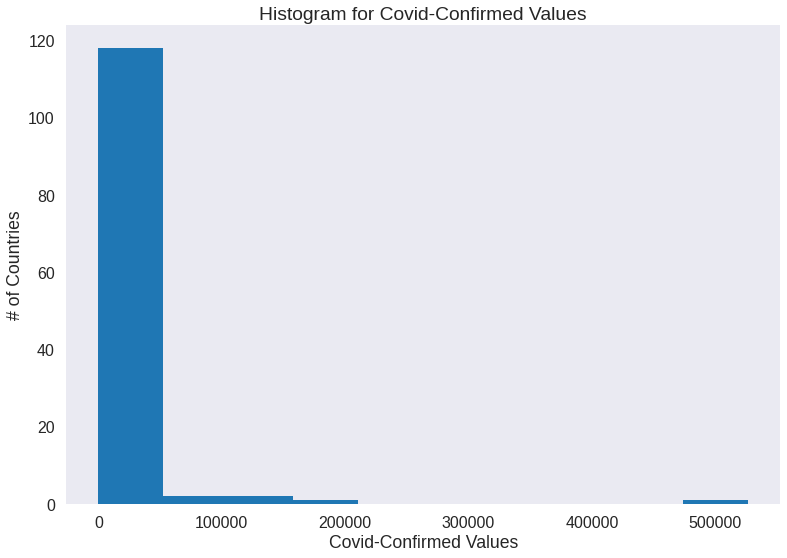

In [0]:
print(CountryxMobilityxCovidData.describe())
print()
plt.hist(CountryxMobilityxCovidData['Covid-Confirmed']) #As we can see from the histogram the confirmed case values have some extreme outliers.
plt.xlabel("Covid-Confirmed Values")
plt.ylabel("# of Countries")
plt.title("Histogram for Covid-Confirmed Values")
plt.style.use('seaborn-poster')
plt.show()
#But I think (looking at our data) there are some countries which have so low confirmed values they may decresase the correlation values.
#So I will filter my data but try not to loose many contries while doing my filtering.(Which means not getting rid of every outlier.) 

In [0]:
filteredData= CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData['Covid-Confirmed'] > 4453) & (CountryxMobilityxCovidData['Covid-Confirmed'] < 250000)]
filteredData
#By looking at histogram values and the statistical values. I chose to filter out America (because it is an extreme outlier)
#and filtered the rest of the countries %75 value of Confirmed Case column. 
#Because the countries which have cases less than 4453, have a higher chance being unaware of the dangers of this pandemic.
#So I get 30 countries which are significantly affected by the COVID-19 pandemic.
countrynamesForReg=np.asarray(filteredData['Country'])
#Got the filtered country names for later use for regression and prediction.

In [0]:
corrMatrixKK = filteredData.corr()
print(corrMatrixKK)
#I want to check correlations of columns RER Mobility and Transit Mobility.

#RER Mobility values have a correlation with;

# Transit Mobility,(Which is not a relation I am interested in this project.)

# Covid-Death column with a value of -0.55 approximetly. Meaning there is a strong relation in the opposite direction.

# Covid-Confirmed column has a value of -0.47 approximetly. 
#    -There is not a strong relation if we just compare it with the value of 0.5.
#    -But I assume when predicting the mobility data Covid-Confirmed values will be a major parameter, and 0.03 difference can be neglected I hope.



#Transit Mobility values have a correlation with;

# RER Mobility,(Which is not a relation I am interested in this project.)

# Covid-Confirmed column with a value of -0.50 approximetly. Meaning there is a strong relation in the opposite direction.

# Covid-Death column with a value of -0.62 approximetly. Meaning there is a strong relation in the opposite direction. 
#    -And this is the strongest correlation value in this table.



                  RER Mobility  Transit Mobility  Covid-Confirmed  Covid-Recovered  Covid-Death
RER Mobility          1.000000          0.821191        -0.469820        -0.384831    -0.550519
Transit Mobility      0.821191          1.000000        -0.502407        -0.363979    -0.618749
Covid-Confirmed      -0.469820         -0.502407         1.000000         0.888461     0.894270
Covid-Recovered      -0.384831         -0.363979         0.888461         1.000000     0.678837
Covid-Death          -0.550519         -0.618749         0.894270         0.678837     1.000000


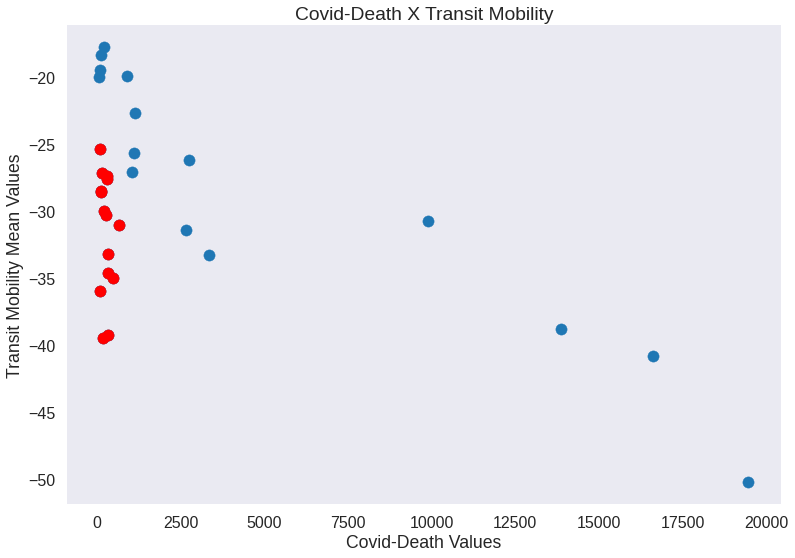


     Country  RER Mobility  Transit Mobility  Covid-Confirmed  Covid-Recovered  Covid-Death
0   Malaysia    -35.526316        -35.964912             4530             1995           73
1    Czechia    -31.578947        -27.122807             5831              411          129
2    Romania    -29.631579        -27.403509             5990              758          291
3    Denmark    -15.807018        -30.280702             6191             2111          260
4     Poland    -28.614035        -29.982456             6356              375          208
5     Norway    -24.333333        -28.473684             6409               32          119
6       Peru    -39.315789        -39.438596             6848             1739          181
7      Chile    -28.491228        -25.315789             6927             1864           73
8    Ecuador    -39.526316        -39.210526             7257              411          315
9      India    -30.789474        -27.561404             8446              969 

In [0]:
plt.scatter(filteredData['Covid-Death'],filteredData['Transit Mobility'])
highlightSuccessCountries= filteredData.loc[(filteredData['Covid-Death'] <1000) & (filteredData['Transit Mobility'] <=-25)]
plt.scatter(highlightSuccessCountries['Covid-Death'],highlightSuccessCountries['Transit Mobility'],color="red")
plt.xlabel("Covid-Death Values")
plt.ylabel("Transit Mobility Mean Values")
plt.title("Covid-Death X Transit Mobility")
plt.style.use('seaborn-poster')
plt.show()
#Scatter plot shows us the correlation btw two variables.
#I highlighted some of the points with blue color, countries represented by that points are some exceptions and in some means sucessful.
#Because goverment or people didn't waited for deaths to increase to take precautions needed.
#RER Mobility x Covid Death looks similiar to this graph, it has the same highlighted country group.

#But this success can be examined furthermore by looking at the covid case values and their mobility means
print()
highlightSuccessCountries=highlightSuccessCountries.sort_values('Covid-Confirmed')
highlightSuccessCountries=highlightSuccessCountries.reset_index(drop=True)
print(highlightSuccessCountries)
print()
print("These 15 countries reacted the virus with social distancing with high ratios and their death counts are very low.")
print("For example even though Malaysia has 73 death count, country reacted the virus with approximetly -35 Mobility mean value.")
print("Not going into further detail we can say that these 15 countries reacted fast to this pandemic in terms of social distancing")

In [0]:
filteredData
#Divided the dataframe into two groups as European Union and Non-European Union countries.
listt=("Austria","Italy","Belgium","Latvia","Bulgaria","Lithuania","Croatia","Luxembourg","Cyprus","Malta","Czechia","The Netherlands","Denmark","Poland","Estonia","Portugal","Finland","Romania","France","Slovakia","Germany","Slovenia","Greece","Spain","Hungary","Sweden","Republic of Ireland")
european = filteredData.loc[filteredData['Country'].isin(listt) == True]
noneuropean = filteredData.loc[filteredData['Country'].isin(listt) == False]
#Reset the indexes.
european=european.reset_index(drop=True)
noneuropean=noneuropean.reset_index(drop=True)
print('There are 12 European Union countries in our filtered data, and 18 non-European Union countries')
print()
print('--EUROPEAN UNION COUNTRIES--')
print(european)
print('------------------------------------------------------------------------------------------')
print('--NON-EUROPEAN UNION COUNTRIES--')
print(noneuropean)


There are 12 European Union countries in our filtered data, and 18 non-European Union countries

--EUROPEAN UNION COUNTRIES--
     Country  RER Mobility  Transit Mobility  Covid-Confirmed  Covid-Recovered  Covid-Death
0    Austria    -38.105263        -33.157895            13806             6604          337
1    Belgium    -37.578947        -33.245614            28018             5986         3346
2    Czechia    -31.578947        -27.122807             5831              411          129
3    Denmark    -15.807018        -30.280702             6191             2111          260
4     France    -41.473684        -38.771930            94863            26663        13851
5    Germany    -25.368421        -26.140351           124908            57400         2736
6      Italy    -50.684211        -50.192982           152271            32534        19468
7     Poland    -28.614035        -29.982456             6356              375          208
8   Portugal    -36.017544        -35.000000  

In [0]:
#Before doing the hypothesis test we should check if there is a significant difference who is it on behalf of.

#After all the filtering we did on countries which are explained above step by step with their reasons;
#We will test if there is a difference btw the two groups with checking "RER Mobility" values and "Transit Mobility" values.
print("Mean RER Mobility value for European Union countries are: ",european['RER Mobility'].mean())
print()
print("Mean RER Mobility value for Non-European Union countries are: ",noneuropean['RER Mobility'].mean())
print("So if there is a significant difference between two two groups in terms of RER Mobility it is on behalf of the European Union Countries.")
print("------------------------------------------------------------------------------------------------------------------------------------------")
print("Mean Transit Mobility value for European Union countries are: ",european['Transit Mobility'].mean())
print()
print("Mean Transit Mobility value for Non-European Union countries are: ",noneuropean['Transit Mobility'].mean())
print("So if there is a significant difference between two two groups in terms of Transit Mobility it is on behalf of the European Union Countries.")

Mean RER Mobility value for European Union countries are:  -32.666666666666664

Mean RER Mobility value for Non-European Union countries are:  -27.58674463937622
So if there is a significant difference between two two groups in terms of RER Mobility it is on behalf of the European Union Countries.
------------------------------------------------------------------------------------------------------------------------------------------
Mean Transit Mobility value for European Union countries are:  -32.66520467836258

Mean Transit Mobility value for Non-European Union countries are:  -27.95224171539961
So if there is a significant difference between two two groups in terms of Transit Mobility it is on behalf of the European Union Countries.


In [0]:
from scipy import stats
eurFemRER=european['RER Mobility']
nonEurFemRER=noneuropean['RER Mobility']

#European countries mobility trend mean for retail and recreation = EUMM
#Non-European countries mobility trend mean for retail and recreation = NEUMM

#Null hypothesis: 
#EUMM - NEUMM = 0, meaning there is no significant difference between the two groups
#Alternative hypothesis:
#EUMM - NEUMM != 0, meaning there is a significant difference between the two groups


tscoreRER,pvalueRER=stats.ttest_ind(eurFemRER,nonEurFemRER)
print("Tscore is: ",tscoreRER," Pvalue is: ",pvalueRER)
print()
print("Our P value for this test is ",pvalueRER," and it is smaller than 0.5.")
print("So we can reject the null hypothesis and accept the alternative hypothesis.")
print()
print("Result from this test tells us;")
print("There is a significant difference between European Union countries and Non-European Union countries in terms of RER Mobility.")
print("From the comparison we did above tells us EU countries have smaller mean value an this means more successful in terms of social distancing.")

Tscore is:  -1.4001947938558368  Pvalue is:  0.1724389147565858

Our P value for this test is  0.1724389147565858  and it is smaller than 0.5.
So we can reject the null hypothesis and accept the alternative hypothesis.

Result from this test tells us;
There is a significant difference between European Union countries and Non-European Union countries in terms of RER Mobility.
From the comparison we did above tells us EU countries have smaller mean value an this means more successful in terms of social distancing.


In [0]:
eurFemTRA=european['Transit Mobility']
nonEurFemTRA=noneuropean['Transit Mobility']

#European countries mobility trend mean for Transit Mobility = EUMMT
#Non-European countries mobility trend mean for Transit Mobility = NEUMMT

#Null hypothesis: 
#EUMMT - NEUMMT = 0, meaning there is no significant difference between the two groups
#Alternative hypothesis:
#EUMMT - NEUMMT != 0, meaning there is a significant difference between the two groups
tscoreTRA,pvalueTRA=stats.ttest_ind(eurFemTRA,nonEurFemTRA)
print("Tscore is: ",tscoreTRA," Pvalue is: ",pvalueTRA)
print()
print("Our P value for this test is ",pvalueTRA," and it is smaller than 0.5.")
print("So we can reject the null hypothesis and accept the alternative hypothesis.")
print()
print("Result from this test tells us;")
print("There is a significant difference between European Union countries and Non-European Union countries in terms of Transit Mobility.")
print("From the comparison we did above tells us EU countries have smaller mean value an this means more successful in terms of social distancing.")

Tscore is:  -1.7491633447610069  Pvalue is:  0.09121843193398015

Our P value for this test is  0.09121843193398015  and it is smaller than 0.5.
So we can reject the null hypothesis and accept the alternative hypothesis.

Result from this test tells us;
There is a significant difference between European Union countries and Non-European Union countries in terms of Transit Mobility.
From the comparison we did above tells us EU countries have smaller mean value an this means more successful in terms of social distancing.


##HYPOTHESIS 2
Oğul Tütüncü 

In [0]:
corona_data = pd.read_csv("community_dataset_with_infection_count.csv", encoding = "ISO-8859-1")
corona_data.index = np.arange(1, len(corona_data) + 1)
corona_data.head(10)

# I got the raw data from the cvs file which we mentioned in the project proposal.

,COUNTRY_REGION_CODE,COUNTRY_REGION,DATE_VAL,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
1,AE,United Arab Emirates,15-02-20,1,0,0,4,0,5,0,...,0,8,3,0,NaN,0.000,69030,9395,1666,3.206997
2,AE,United Arab Emirates,16-02-20,2,1,-1,4,0,4,1,...,0,9,4,0,1.0,0.125,71224,10865,1770,3.178328
3,AE,United Arab Emirates,17-02-20,3,-1,2,1,3,5,-1,...,0,9,4,0,0.0,0.000,73258,12583,1868,2.855779
4,AE,United Arab Emirates,18-02-20,4,-2,1,1,0,5,0,...,0,9,4,0,0.0,0.000,75136,14352,2007,2.563543
5,AE,United Arab Emirates,19-02-20,5,-2,0,0,1,4,1,...,0,9,4,0,0.0,0.000,75639,16121,2122,0.669453
6,AE,United Arab Emirates,20-02-20,6,-2,0,1,-1,6,-2,...,0,9,4,0,0.0,0.000,76197,18177,2247,0.737715
7,AE,United Arab Emirates,21-02-20,7,-3,1,2,-1,6,0,...,0,9,4,0,0.0,0.000,76819,18890,2251,0.816305
8,AE,United Arab Emirates,22-02-20,8,-2,-1,2,0,4,2,...,0,13,4,0,4.0,0.444,78572,22886,2458,2.281988
9,AE,United Arab Emirates,23-02-20,9,-1,-1,3,-1,3,1,...,0,13,4,0,0.0,0.000,78958,23394,2469,0.491269
10,AE,United Arab Emirates,24-02-20,10,-3,2,0,3,5,-2,...,0,13,4,0,0.0,0.000,79561,25227,2629,0.763697


In [0]:
necessary_data = corona_data[["COUNTRY_REGION", "DATE_VAL", "DAY_CT", "COVID_CONFIRMED", "COVID_RECOVERED", "COVID_DEATHS", "COVID_CNTY_NEW_CASES", "COVID_COUNTRY_INC_RATE"]]
necessary_data.head(10)

# After getting the raw data, I got rid of the columns that I will not use in this hypothesis.
# The columns which I will use are COUNTRY_REGION and COVID_CONFIRMED but I got the other columns to see correlation and covariance between each other. 

,COUNTRY_REGION,DATE_VAL,DAY_CT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
1,United Arab Emirates,15-02-20,1,8,3,0,NaN,0.000
2,United Arab Emirates,16-02-20,2,9,4,0,1.0,0.125
3,United Arab Emirates,17-02-20,3,9,4,0,0.0,0.000
4,United Arab Emirates,18-02-20,4,9,4,0,0.0,0.000
5,United Arab Emirates,19-02-20,5,9,4,0,0.0,0.000
6,United Arab Emirates,20-02-20,6,9,4,0,0.0,0.000
7,United Arab Emirates,21-02-20,7,9,4,0,0.0,0.000
8,United Arab Emirates,22-02-20,8,13,4,0,4.0,0.444
9,United Arab Emirates,23-02-20,9,13,4,0,0.0,0.000
10,United Arab Emirates,24-02-20,10,13,4,0,0.0,0.000


In [0]:
last_day_data = necessary_data.copy() # I did this because I did not want to lose the data from the dataset.

last_day = last_day_data.DAY_CT == 57

last_day_data.drop(last_day_data[last_day== False].index, inplace=True)
last_day_data.index = np.arange(1, len(last_day_data) + 1)

last_day_data.head(10)

# Then, I got only the last day of our data because last day is enough to understand the spread of COVID-19 in those countries.

,COUNTRY_REGION,DATE_VAL,DAY_CT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
1,United Arab Emirates,11-04-20,57,3736,588,20,376.0,0.112
2,Afghanistan,11-04-20,57,555,32,18,34.0,0.065
3,Antigua and Barbuda,11-04-20,57,21,0,2,2.0,0.105
4,Angola,11-04-20,57,19,4,2,0.0,0.000
5,Argentina,11-04-20,57,1975,440,83,0.0,0.000
6,Austria,11-04-20,57,13806,6604,337,251.0,0.019
7,Australia,11-04-20,57,6303,1806,57,88.0,0.014
8,Bosnia and Herzegovina,11-04-20,57,946,139,37,45.0,0.050
9,Barbados,11-04-20,57,68,11,4,1.0,0.015
10,Bangladesh,11-04-20,57,482,36,30,58.0,0.137


In [0]:
without_day_count = last_day_data [["COUNTRY_REGION", "DATE_VAL", "COVID_CONFIRMED", "COVID_RECOVERED", "COVID_DEATHS", "COVID_CNTY_NEW_CASES", "COVID_COUNTRY_INC_RATE"]]

# I got rid of the repetitive values (DATE_VAL and DAY_CT) to get clear results on describe, correlation and covariance methods.

In [0]:
without_day_count.head(10)

,COUNTRY_REGION,DATE_VAL,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
1,United Arab Emirates,11-04-20,3736,588,20,376.0,0.112
2,Afghanistan,11-04-20,555,32,18,34.0,0.065
3,Antigua and Barbuda,11-04-20,21,0,2,2.0,0.105
4,Angola,11-04-20,19,4,2,0.0,0.000
5,Argentina,11-04-20,1975,440,83,0.0,0.000
6,Austria,11-04-20,13806,6604,337,251.0,0.019
7,Australia,11-04-20,6303,1806,57,88.0,0.014
8,Bosnia and Herzegovina,11-04-20,946,139,37,45.0,0.050
9,Barbados,11-04-20,68,11,4,1.0,0.015
10,Bangladesh,11-04-20,482,36,30,58.0,0.137


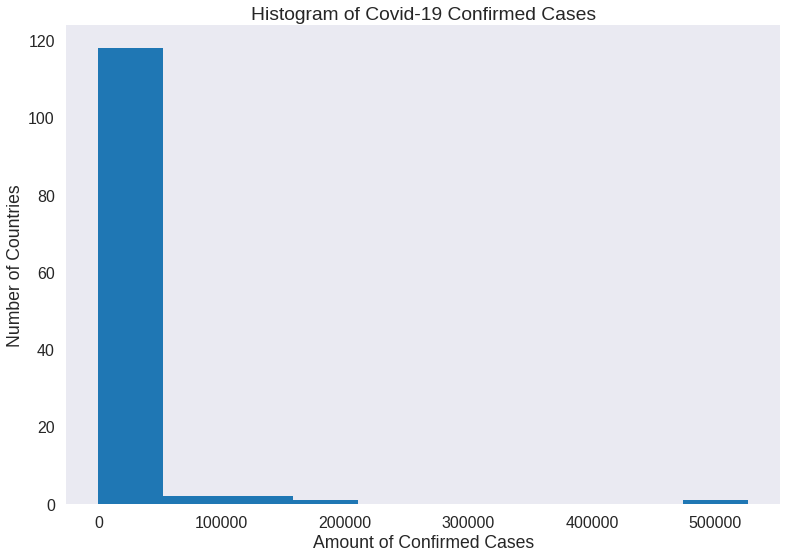

In [0]:
plt.hist(without_day_count["COVID_CONFIRMED"])
plt.title("Histogram of Covid-19 Confirmed Cases")
plt.style.use('seaborn-dark')
plt.ylabel("Number of Countries")
plt.xlabel("Amount of Confirmed Cases")
plt.show()

# As you can see in the histogram that there are one country (United States) more than 500.000
# The rest of them accumulated between 0 and 100.000

In [0]:
without_day_count.describe()

# There are 124 countries in our data and the mean of COVID-19 confirmed cases is 124.486
# Minimum valuse is 1 so that means at the last day every one of our countries has the virus.

,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
count,124.00000,124.000000,124.000000,124.000000,124.000000
mean,12486.75000,2239.774194,805.701613,590.016129,0.053306
std,53021.61741,8682.978779,3269.021258,2817.299736,0.057174
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,119.50000,16.750000,3.000000,2.000000,0.015000
50%,790.00000,95.500000,19.000000,32.000000,0.036000
75%,4453.50000,429.500000,100.250000,224.750000,0.081000
max,526396.00000,59109.000000,20462.000000,29861.000000,0.407000


In [0]:
without_day_count.corr()

# The highest correlation is between new cases and confirmed cases. It is so predictable because they are related.
# At the same time, that correlation is the highest positive correlation. The highest negative correlation is between recovered cases and increase rate.

,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
COVID_CONFIRMED,1.000000,0.678550,0.842888,0.970408,-0.013299
COVID_RECOVERED,0.678550,1.000000,0.748092,0.497141,-0.077672
COVID_DEATHS,0.842888,0.748092,1.000000,0.745006,-0.033373
COVID_CNTY_NEW_CASES,0.970408,0.497141,0.745006,1.000000,0.029750
COVID_COUNTRY_INC_RATE,-0.013299,-0.077672,-0.033373,0.029750,1.000000


In [0]:
without_day_count.cov()

# The highest positive covariance is between confirmed cases and recovered cases. That means recovered cases are very high and the fatality rate of 
# COVID-19 is very low. Otherwise death cases would be higher than recovered cases. The highest negative covariance is between increased rate and
# confirmed cases. That is a good thing for the humankind because whenever confirmed cases got increased then, increase rate would get lower.

,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE
COVID_CONFIRMED,2.811292e+09,3.123946e+08,1.460967e+08,1.449574e+08,-40.314679
COVID_RECOVERED,3.123946e+08,7.539412e+07,2.123447e+07,1.216133e+07,-38.559264
COVID_DEATHS,1.460967e+08,2.123447e+07,1.068650e+07,6.861364e+06,-6.237542
COVID_CNTY_NEW_CASES,1.449574e+08,1.216133e+07,6.861364e+06,7.937178e+06,4.791971
COVID_COUNTRY_INC_RATE,-4.031468e+01,-3.855926e+01,-6.237542e+00,4.791971e+00,0.003269


In [0]:
country_temp = pd.read_csv("matYearCountry.csv", encoding = "ISO-8859-1")
country_temp.index = np.arange(1, len(country_temp) + 1)
country_temp

# I got the average temperatures of countries from the https://www.kaggle.com/akshaychavan/average-temperature-per-country-per-year
# On this link I only got the matYearCountry.cvs file to add the means of the countries to my dataframe.

,year,Ã land,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,year.1
1,2000,7.283333,15.497833,24.588083,13.746583,24.032250,27.219833,12.311917,22.360667,27.052750,...,17.756750,13.938833,25.388500,23.981917,26.730583,23.020083,27.436167,21.558750,21.149000,NaN
2,2001,6.401500,15.778083,24.841167,13.690417,24.724417,27.227583,12.216083,22.502917,27.408500,...,18.574250,13.998000,25.771333,24.184917,27.133167,23.704917,27.068917,21.802417,21.693667,NaN
3,2002,6.801083,15.537667,24.961333,13.559917,24.263000,27.537917,12.319583,22.925500,27.538250,...,17.993917,13.871917,25.772167,24.393750,27.297833,23.457833,27.125167,22.292417,22.081083,NaN
4,2003,6.323417,14.916000,25.025583,13.626583,24.393667,27.264833,12.900667,23.066583,27.677417,...,17.604667,13.157667,26.008333,24.497750,27.376583,23.408917,27.357750,22.156750,21.891250,NaN
5,2004,6.518667,15.770917,24.895917,13.258167,23.916000,27.281167,12.043000,22.572833,27.334000,...,18.060833,14.442000,25.817833,24.056917,27.029250,23.420667,27.334083,21.768083,21.330917,NaN
6,2005,6.724083,14.980000,25.156167,12.747083,24.222583,27.373500,11.643417,22.966083,27.732333,...,18.194417,14.044000,26.019417,24.298000,27.424667,23.507667,27.294667,22.813500,22.509917,NaN
7,2006,7.100583,15.595583,24.818917,12.976917,24.200833,27.081250,12.834333,21.947083,27.636250,...,18.240417,13.786250,25.849917,24.523083,27.374833,23.441833,27.175000,21.784250,21.618750,NaN
8,2007,7.029000,15.106167,24.851500,13.890500,24.065333,27.452417,12.155250,22.427083,27.685083,...,17.516167,13.928333,25.854083,24.302167,27.470000,23.145417,27.310750,21.838500,21.604250,NaN
9,2008,7.492250,15.216500,24.754667,13.955167,23.950250,26.995083,11.978583,22.287333,27.140417,...,18.280500,13.309000,25.648250,23.784000,26.924000,23.323083,26.807500,21.535833,21.545583,NaN
10,2009,6.489083,15.257750,25.026500,13.844250,24.154333,27.034250,12.566667,22.316500,27.468583,...,17.871333,13.700333,26.084917,24.465583,27.238500,23.381083,27.342417,21.670250,21.377250,NaN


In [0]:
country_temp.describe()

# This table shows the mean of the average temperature for 243 countries. The years are between 2000 and 2013(mean of 14 years).

,year,Ã land,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,year.1
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0
mean,2006.5000,6.606381,15.429884,24.936679,13.662598,24.311345,27.260673,12.292324,22.479640,27.504298,...,17.935807,13.926839,25.831699,24.353604,27.244631,23.455333,27.315583,21.868113,21.615887,NaN
std,4.1833,0.659774,0.497066,0.228610,0.519348,0.418678,0.186700,0.438571,0.342418,0.227262,...,0.461104,0.776332,0.200235,0.412345,0.230942,0.266129,0.287347,0.399441,0.431844,NaN
min,2000.0000,4.861917,14.481583,24.588083,12.747083,23.916000,26.995083,11.480833,21.947083,27.052750,...,16.754375,13.141083,25.388500,23.692583,26.730583,23.020083,26.807500,21.196000,20.710750,NaN
25%,2003.2500,6.342938,15.133750,24.794604,13.472417,24.040521,27.111292,12.071063,22.294625,27.374375,...,17.773708,13.406833,25.709271,24.088917,27.139687,23.337583,27.203312,21.677125,21.413271,NaN
50%,2006.5000,6.621375,15.507917,24.873708,13.718500,24.177583,27.246208,12.309896,22.465000,27.533292,...,17.957000,13.900125,25.833875,24.347958,27.305083,23.414792,27.306750,21.777917,21.603333,NaN
75%,2009.7500,7.082688,15.727083,25.026271,13.827042,24.361000,27.432688,12.509979,22.654333,27.667875,...,18.228917,14.032500,25.984469,24.516750,27.376146,23.495208,27.353917,22.077187,21.841854,NaN
max,2013.0000,7.492250,16.533625,25.472500,14.993875,25.215667,27.537917,12.994417,23.066583,27.856000,...,18.574250,16.188250,26.150250,25.232125,27.593667,24.114250,28.129750,22.813500,22.509917,NaN


In [0]:
CountryArr = np.asarray(country_temp.columns.values) # country names
means = list() # mean temperatures of countries
covidConf = list() # confirmed cases of countries

# All of these data will be the columns of the new dataframe to explain hypothesis

for names in CountryArr:
  tempData = last_day_data.loc[last_day_data['COUNTRY_REGION'] == names]
  means.append(country_temp[names].mean()) # inserting the means to the means list
  need=tempData.loc[tempData['DAY_CT']==57]
  covidConf.append(need['COVID_CONFIRMED'].sum()) # inserting the confirmed cases to covidConf list


meansArr = np.asarray(means) # I converted the mean temperatures to an array to able to add and did the same thing for confirmed cases
covidArr = np.asarray(covidConf)

MeansData = {'CountryName': CountryArr,
            'MeanTemperature': meansArr,
             'CovidConfirmed': covidArr
        }
# Inserted those values to dataframe

Country_List = pd.DataFrame(MeansData, columns = ['CountryName','MeanTemperature', 'CovidConfirmed'])

# Created the new dataframe and its columns

Country_List.drop(index=0, inplace=True)
Country_List.drop(index=1, inplace=True)
Country_List.drop(index=244, inplace=True)

# Dropped the unnecessary rows from the average temperature dataframe

final_data = Country_List.loc[Country_List["CovidConfirmed"]!=0]
final_data.index = np.arange(1, len(final_data) + 1)
final_data.head(10)

,CountryName,MeanTemperature,CovidConfirmed
1,Afghanistan,15.429884,555
2,Angola,22.479640,19
3,Argentina,15.224443,1975
4,Australia,22.233396,6303
5,Austria,7.504080,13806
6,Bahrain,27.334372,1040
7,Bangladesh,25.508357,482
8,Barbados,27.340229,68
9,Belarus,7.376976,2226
10,Belgium,10.651229,28018


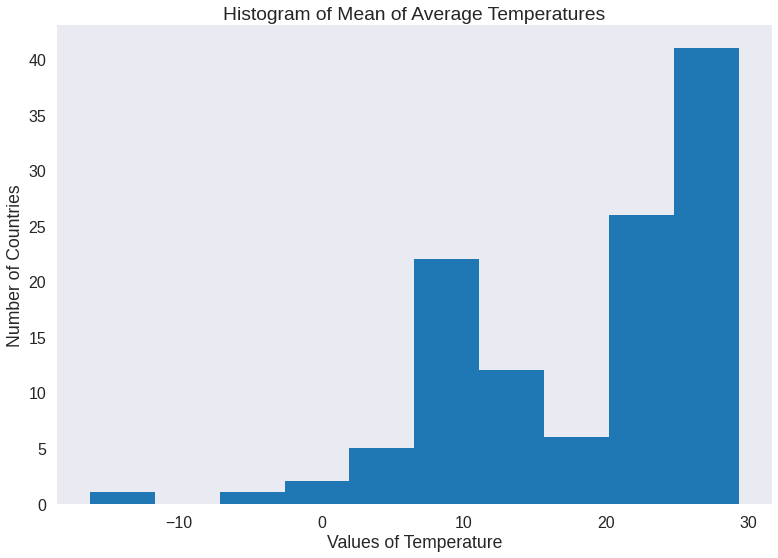

In [0]:
plt.hist(final_data["MeanTemperature"])
plt.title("Histogram of Mean of Average Temperatures")
plt.style.use('seaborn-dark')
plt.xlabel("Values of Temperature")
plt.ylabel("Number of Countries")
plt.show()

# Most of the countries are between 10 and 30 celcius. That slides the mean to 20.

In [0]:
final_data.describe()

# There are 116 countries in our data and the mean is 18.78. The highest average temperature is 29.3 and the lowest average temperature is -16.28

,MeanTemperature,CovidConfirmed
count,116.000000,116.000000
mean,18.787528,13280.732759
std,8.777956,54742.680981
min,-16.285232,1.000000
25%,10.997121,136.000000
50%,22.050754,945.500000
75%,25.955204,4650.250000
max,29.357673,526396.000000


In [0]:
high_temp_countries = final_data.copy()

low_temp_countries = final_data.copy()

correct_value = final_data.CovidConfirmed > 3000

# I thought it is a good number to choose 3000 because that means the virus in that country has spread enough and been there a long time.
# I had to lower the size of the sample and 3000 was a good point to cut.

high_temp = final_data.MeanTemperature > 19

low_temp = final_data.MeanTemperature < 19

# I picked the number 19 to cut the temperature column into 2 different pieces to see high and low temperatured countries.
# The reason why I chose 19 is the closest integer to mean of average temperature value was 19 and the actual value was 18.78

In [0]:
high_temp_countries.drop(high_temp_countries[high_temp == False].index, inplace=True)
high_temp_countries.drop(high_temp_countries[correct_value == False].index, inplace=True)
high_temp_countries.index = np.arange(1, len(high_temp_countries) + 1)
high_temp_countries

# Those are the countries which has high mean of average temperatures and their COVID-19 confirmed cases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CountryName,MeanTemperature,CovidConfirmed
1,Australia,22.233396,6303
2,Brazil,25.566229,20727
3,Ecuador,22.458747,7257
4,India,24.730571,8446
5,Indonesia,26.364750,3842
6,Israel,20.798134,10743
7,Malaysia,26.588065,4530
8,Mexico,21.336462,3844
9,Pakistan,21.769676,5011
10,Peru,20.368565,6848


In [0]:
low_temp_countries.drop(low_temp_countries[low_temp == False].index, inplace=True)
low_temp_countries.drop(low_temp_countries[correct_value == False].index, inplace=True)
low_temp_countries.index = np.arange(1, len(low_temp_countries) + 1)
low_temp_countries

# Those are the countries which has low mean of average temperatures and their COVID-19 confirmed cases.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CountryName,MeanTemperature,CovidConfirmed
1,Austria,7.504080,13806
2,Belgium,10.651229,28018
3,Canada,-3.485292,23316
4,Chile,9.929866,6927
5,Denmark,-16.285232,6191
6,France,13.847045,94863
7,Germany,9.387149,124908
8,Ireland,10.252768,8928
9,Italy,13.888286,152271
10,Japan,12.847250,6005


In [0]:
from scipy import stats as st

mean_low = low_temp_countries.CovidConfirmed.mean()

mean_high = high_temp_countries.CovidConfirmed.mean()

print("Mean of confirmed COVID-19 cases for low average temperatured  countries:", mean_low)

print("-------------------------------")

print("Mean of confirmed COVID-19 cases for high average temperatured countries:", mean_high)

print("-------------------------------")

print("Mean difference between them:", mean_high-mean_low)

# I wanted to show the mean of confirmed cases for high and low averaged temperatured countries and mean difference before the t test.
# I am doing this to see if there is a significant difference between them and the difference is clearly visible.

Mean of confirmed COVID-19 cases for low average temperatured  countries: 60652.95652173913
-------------------------------
Mean of confirmed COVID-19 cases for high average temperatured countries: 6903.692307692308
-------------------------------
Mean difference between them: -53749.26421404682


In [0]:
#Confirmed cases of the countries which are close to equator line = CCCE
#Confirmed cases of the countries which are far from equator line = CCFE 

#Null hypothesis:
#CCCE - CCFE = 0, means the temperature does not affect this pandemic
#Alternative hypothesis:
#CCE - CCFE != 0, means the temperature affects this pandemic


tScoreCOV, tScoreCOV = st.ttest_ind(high_temp_countries["CovidConfirmed"], low_temp_countries["CovidConfirmed"])

print("T score is:", tScoreCOV," P value is:", tScoreCOV)

# P value of this test is 0.09681530436461572 and it is smaller than 0.5 so we can reject the null hypothesis and accept the alternative hypothesis.
# This test shows us that there is a significant difference of confirmed cases between means of high and low averaged temperature countries.
# Temperature can be a important factor in the spread of COVID-19 but to see this in a detailed version, there has to be more testing of other factors.
# For example, that country's distance from the center of the virus, population of that country, popularity to travel of that country, etc.

T score is: 0.09681530436461572  P value is: 0.09681530436461572


##HYPOTHESIS 3
Alp İnce

In [0]:
covid_data = raw_data.copy(deep= True)
covid_data

,COUNTRY_REGION_CODE,COUNTRY_REGION,DATE_VAL,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
0,AE,United Arab Emirates,15-02-20,1,0,0,4,0,5,0,...,0,8,3,0,NaN,0.000,69030,9395,1666,3.206997
1,AE,United Arab Emirates,16-02-20,2,1,-1,4,0,4,1,...,0,9,4,0,1.0,0.125,71224,10865,1770,3.178328
2,AE,United Arab Emirates,17-02-20,3,-1,2,1,3,5,-1,...,0,9,4,0,0.0,0.000,73258,12583,1868,2.855779
3,AE,United Arab Emirates,18-02-20,4,-2,1,1,0,5,0,...,0,9,4,0,0.0,0.000,75136,14352,2007,2.563543
4,AE,United Arab Emirates,19-02-20,5,-2,0,0,1,4,1,...,0,9,4,0,0.0,0.000,75639,16121,2122,0.669453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,ZW,Zimbabwe,07-04-20,53,-64,-2,-52,-3,-49,1,...,-2,11,0,2,1.0,0.100,1395194,300054,81865,5.578060
7064,ZW,Zimbabwe,08-04-20,54,-62,-2,-51,-1,-51,2,...,-1,11,0,3,0.0,0.000,1480202,328661,88338,6.092916
7065,ZW,Zimbabwe,09-04-20,55,-60,-2,-47,-4,-47,-4,...,0,11,0,3,0.0,0.000,1563935,353975,95455,5.656863
7066,ZW,Zimbabwe,10-04-20,56,-70,10,-57,10,-53,6,...,7,13,0,3,2.0,0.182,1657526,376096,102525,5.984328


In [0]:
#I've created this dataframe in order to see total covid-19 cases for every country. 
dayCT_data = covid_data[(covid_data['DAY_CT'] == 57)]
dayCT_data

,COUNTRY_REGION_CODE,COUNTRY_REGION,DATE_VAL,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
56,AE,United Arab Emirates,11-04-20,57,-64,-10,-32,-14,-77,-9,...,1,3736,588,20,376.0,0.112,1735650,402110,108502,4.71329
113,AF,Afghanistan,11-04-20,57,-46,5,-32,10,-12,2,...,5,555,32,18,34.0,0.065,1735650,402110,108502,4.71329
170,AG,Antigua and Barbuda,11-04-20,57,-70,-25,-45,-50,-56,-24,...,0,21,0,2,2.0,0.105,1735650,402110,108502,4.71329
227,AO,Angola,11-04-20,57,-53,-7,-32,-5,-37,-12,...,-14,19,4,2,0.0,0.000,1735650,402110,108502,4.71329
284,AR,Argentina,11-04-20,57,-84,-6,-34,-24,-80,-5,...,-8,1975,440,83,0.0,0.000,1735650,402110,108502,4.71329
341,AT,Austria,11-04-20,57,-81,5,-27,11,-20,-2,...,-9,13806,6604,337,251.0,0.019,1735650,402110,108502,4.71329
398,AU,Australia,11-04-20,57,-40,-36,-2,-53,-51,8,...,-15,6303,1806,57,88.0,0.014,1735650,402110,108502,4.71329
455,BA,Bosnia and Herzegovina,11-04-20,57,-67,5,-34,10,-5,3,...,-5,946,139,37,45.0,0.050,1735650,402110,108502,4.71329
512,BB,Barbados,11-04-20,57,-77,-16,-62,-32,-67,-17,...,25,68,11,4,1.0,0.015,1735650,402110,108502,4.71329
569,BD,Bangladesh,11-04-20,57,-76,-1,-55,-1,-34,-6,...,4,482,36,30,58.0,0.137,1735650,402110,108502,4.71329


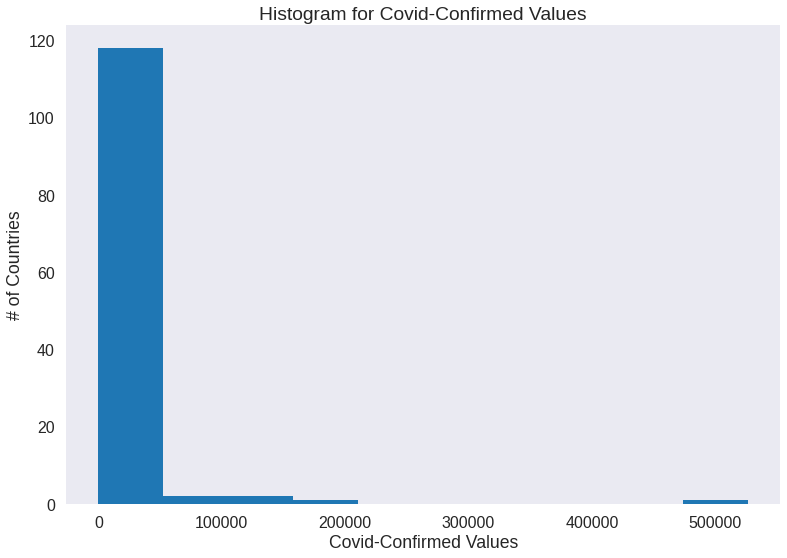

In [0]:
plt.hist(dayCT_data['COVID_CONFIRMED'])
plt.xlabel("Covid-Confirmed Values")
plt.ylabel("# of Countries")
plt.title("Histogram for Covid-Confirmed Values")
plt.show()
#Betweeen the confirmed cases, the difference is too big. 
#I will remove the outliers to make the result reasonable

In [0]:
# I removed quantiles because the differences between the most confirmed case and the least confirmed case is too big. 
#And this difference originated from population differences. Thats why my comparison between mobility trends would not be correct. 
# I created a new dataframe for the last day to see latest confirmed cases without quantiles. 
#dayCount_data_withoutQuantile.
dayCT_data_woQuantile = dayCT_data[dayCT_data['COVID_CONFIRMED'].between(dayCT_data['COVID_CONFIRMED'].quantile(.25), dayCT_data['COVID_CONFIRMED'].quantile(.75))]
dayCT_data_woQuantile.tail(60)

,COUNTRY_REGION_CODE,COUNTRY_REGION,DATE_VAL,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
284,AR,Argentina,11-04-20,57,-84,-6,-34,-24,-80,-5,...,-8,1975,440,83,0.0,0.000,1735650,402110,108502,4.71329
455,BA,Bosnia and Herzegovina,11-04-20,57,-67,5,-34,10,-5,3,...,-5,946,139,37,45.0,0.050,1735650,402110,108502,4.71329
569,BD,Bangladesh,11-04-20,57,-76,-1,-55,-1,-34,-6,...,4,482,36,30,58.0,0.137,1735650,402110,108502,4.71329
683,BF,Burkina Faso,11-04-20,57,-32,4,-22,-1,-15,-6,...,-3,484,155,27,41.0,0.093,1735650,402110,108502,4.71329
740,BG,Bulgaria,11-04-20,57,-55,6,-19,4,-38,10,...,-7,661,62,28,26.0,0.041,1735650,402110,108502,4.71329
797,BH,Bahrain,11-04-20,57,-38,-12,-15,-9,-44,-16,...,-3,1040,555,6,115.0,0.124,1735650,402110,108502,4.71329
911,BO,Bolivia,11-04-20,57,-84,-8,-67,-25,-77,-11,...,-11,275,2,20,7.0,0.026,1735650,402110,108502,4.71329
1139,BY,Belarus,11-04-20,57,-31,9,-7,7,5,2,...,-5,2226,172,23,245.0,0.124,1735650,402110,108502,4.71329
1424,CM,Cameroon,11-04-20,57,-31,-1,-22,0,-23,-3,...,-3,820,98,12,0.0,0.000,1735650,402110,108502,4.71329
1481,CO,Colombia,11-04-20,57,-84,-6,-65,-10,-77,-5,...,-10,2709,214,100,236.0,0.095,1735650,402110,108502,4.71329


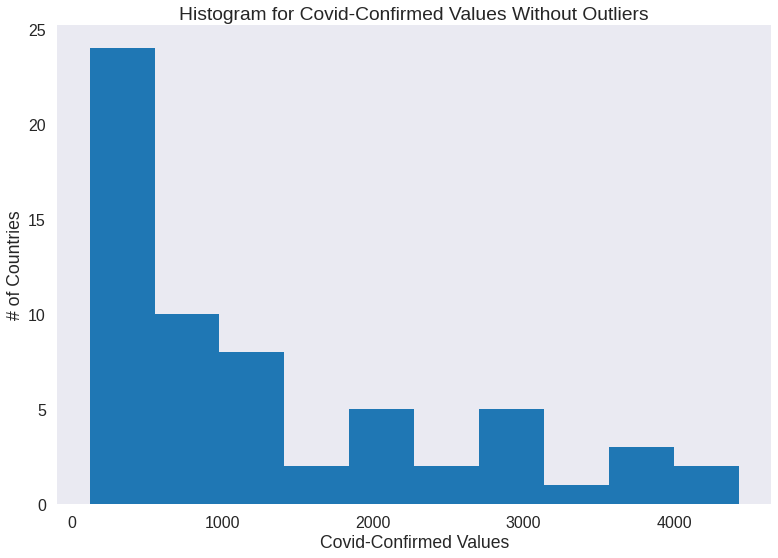

In [0]:
plt.hist(dayCT_data_woQuantile['COVID_CONFIRMED'])
plt.xlabel("Covid-Confirmed Values")
plt.ylabel("# of Countries")
plt.title("Histogram for Covid-Confirmed Values Without Outliers")
plt.show()

In [0]:
dayCT_data_woQuantile.describe()

,DAY_CT,RETAIL_AND_RECREATION_PCT,INC_RETAIL_AND_RECREATION_PCT,GROCERY_AND_PHARMACY_PCT,INC_GROCERY_AND_PHARMACY_PCT,PARKS_PCT,INC_PARKS_PCT,TRANSIT_STATIONS_PCT,INC_TRANSIT_STATIONS_PCT,WORKPLACES_PCT,...,INC_RESIDENTIAL_PCT,COVID_CONFIRMED,COVID_RECOVERED,COVID_DEATHS,COVID_CNTY_NEW_CASES,COVID_COUNTRY_INC_RATE,COVID_WORLD_CONFIRMED,COVID_WORLD_RECOVERED,COVID_WORLD_DEATHS,COVID_WORLD_INC_RATE
count,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,6.200000e+01
mean,57.0,-64.161290,-1.645161,-37.564516,-5.500000,-41.112903,3.258065,-62.645161,-3.645161,-44.306452,...,-7.064516,1286.080645,192.677419,38.838710,78.338710,0.056177,1735650.0,402110.0,108502.0,4.713290e+00
std,0.0,17.945449,8.545149,21.993010,22.593884,30.452384,12.857269,17.187583,8.186548,18.406689,...,7.242568,1176.690765,222.254010,62.223604,103.314091,0.041552,0.0,0.0,0.0,2.686287e-15
min,57.0,-96.000000,-30.000000,-95.000000,-82.000000,-86.000000,-19.000000,-95.000000,-27.000000,-84.000000,...,-25.000000,120.000000,2.000000,0.000000,0.000000,0.000000,1735650.0,402110.0,108502.0,4.713290e+00
25%,57.0,-77.500000,-6.000000,-51.500000,-9.750000,-63.750000,-5.000000,-78.000000,-7.750000,-57.750000,...,-11.000000,382.000000,41.750000,6.000000,10.250000,0.024000,1735650.0,402110.0,108502.0,4.713290e+00
50%,57.0,-66.000000,-2.500000,-33.500000,-3.000000,-41.500000,1.000000,-63.000000,-4.000000,-45.000000,...,-7.000000,790.000000,103.500000,19.000000,36.500000,0.043500,1735650.0,402110.0,108502.0,4.713290e+00
75%,57.0,-52.500000,3.000000,-22.000000,3.000000,-23.000000,7.000000,-50.250000,-0.250000,-31.000000,...,-3.000000,2014.750000,263.500000,36.500000,118.750000,0.086750,1735650.0,402110.0,108502.0,4.713290e+00
max,57.0,-18.000000,37.000000,0.000000,86.000000,89.000000,55.000000,-27.000000,34.000000,4.000000,...,8.000000,4428.000000,1135.000000,327.000000,403.000000,0.162000,1735650.0,402110.0,108502.0,4.713290e+00


In [0]:
#I will choose the countries from upper bounds. 
#After 57 days at Philippines, the total confirmed case is 4428. And this is max confirmed case number after I removed the quantiles. 
#After 57 days at South Africa, the total confirmed case is 2028. This value from .75 percentile. 
print("The least covid-19 case number is: ", dayCT_data_woQuantile['COVID_CONFIRMED'].quantile(.75))
print("The most covid-19 case number is: ",dayCT_data_woQuantile['COVID_CONFIRMED'].max())

The least covid-19 case number is:  2014.75
The most covid-19 case number is:  4428


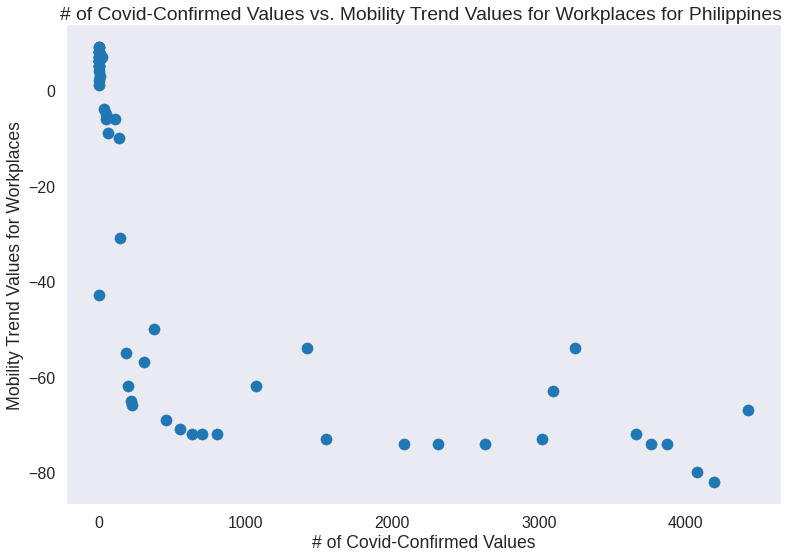

In [0]:
workplaceP = covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].WORKPLACES_PCT
confirmedP = covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].COVID_CONFIRMED
plt.scatter(confirmedP,workplaceP)
plt.xlabel("# of Covid-Confirmed Values")
plt.ylabel("Mobility Trend Values for Workplaces")
plt.title("# of Covid-Confirmed Values vs. Mobility Trend Values for Workplaces for Philippines ")
plt.show()
#We can say that, people in Philippines paid attention to social distance before the outbreak spread further.

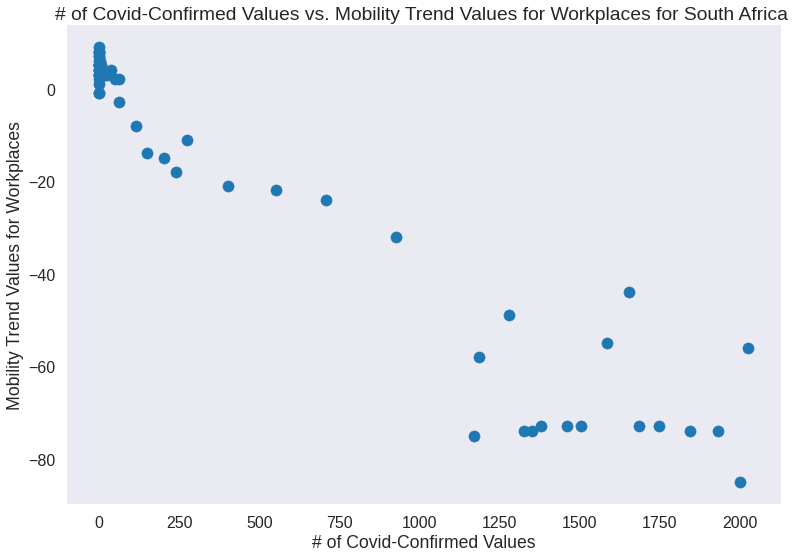

In [0]:
workplaceA = covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].WORKPLACES_PCT
confirmedA = covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].COVID_CONFIRMED
plt.scatter(confirmedA,workplaceA)
plt.xlabel("# of Covid-Confirmed Values")
plt.ylabel("Mobility Trend Values for Workplaces")
plt.title("# of Covid-Confirmed Values vs. Mobility Trend Values for Workplaces for South Africa ")
plt.show()
#We can say that, as the number of sick people in South Africa increases, the government may have intervened in their workplaces.
#Because workplace mobility trend is suddenly decreasing before the number of patients exceeds 1000.

In [0]:
corrv = covid_data['COVID_CONFIRMED'].corr(covid_data['WORKPLACES_PCT'])
corrP = covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].WORKPLACES_PCT.corr(covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].COVID_CONFIRMED)
print("Correlation between confirmed case number and workplace mobilty trend in Philippines is: ",corrP)
corrA = covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].WORKPLACES_PCT.corr(covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].COVID_CONFIRMED)
print("Correlation between confirmed case number and workplace mobility trend in South Africa is: ", corrA)
#Both correlation values are very close to -1. Therefore we can say that, their workplace mobility trends decreased as the number of cases increased.

Correlation between confirmed case number and workplace mobilty trend in Philippines is:  -0.7082387988330051
Correlation between confirmed case number and workplace mobility trend in South Africa is:  -0.9609910848493902


In [0]:
meanWorkplaceMobilityP = covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].WORKPLACES_PCT.mean()
print("The mean of workplace mobility trend for Philippines: " , meanWorkplaceMobilityP)

meanWorkplaceMobilityA = covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].WORKPLACES_PCT.mean()
print("The mean of workplace mobility trend for South Africa", meanWorkplaceMobilityA)

print("The differences between thier mean workplace mobility trend is: " , meanWorkplaceMobilityP - meanWorkplaceMobilityA)

The mean of workplace mobility trend for Philippines:  -30.43859649122807
The mean of workplace mobility trend for South Africa -19.63157894736842
The differences between thier mean workplace mobility trend is:  -10.807017543859647


In [0]:
from scipy import stats
workplaceMobilityP = covid_data[covid_data['COUNTRY_REGION'] == 'Philippines'].WORKPLACES_PCT
workplaceMobilityA = covid_data[covid_data['COUNTRY_REGION'] == 'South Africa'].WORKPLACES_PCT

#The mean of workplace mobility trend of the country with the highest confirmed cases: WPHC
#The mean of workplace mobility trend of the country with the lowest confirmed cases: WPLC

#Null hypothesis: 
#WPHC - WPLC = 0, means the confirmed cases do not affect the mobility trend of workplaces.
#Alternative hypothesis: 
#WPHC - WPLC != 0, means the confirmed cases affect the mobility trend of workplaces.

tscoreWP, pvalueWP = stats.ttest_ind(workplaceMobilityP, workplaceMobilityA, equal_var = True)
print("Tscore is: ",tscoreWP," Pvalue is: ",pvalueWP)
print("Our P value for this test is ",pvalueWP," and it is smaller than 0.5.")
print("So we can reject the null hypothesis and accept the alternative hypothesis.")
print()

Tscore is:  -1.694902134209738  Pvalue is:  0.09287265817499174
Our P value for this test is  0.09287265817499174  and it is smaller than 0.5.
So we can reject the null hypothesis and accept the alternative hypothesis.



Result from this test tells us;
There is a significant difference between Philippines and South Africa in terms of workplace mobility trend.
From the comparison we did above tells us Philippines have smaller mean value an this means more successful in terms of social distancing.

##CLASSIFICATION AND PREDICTION

###Clustering

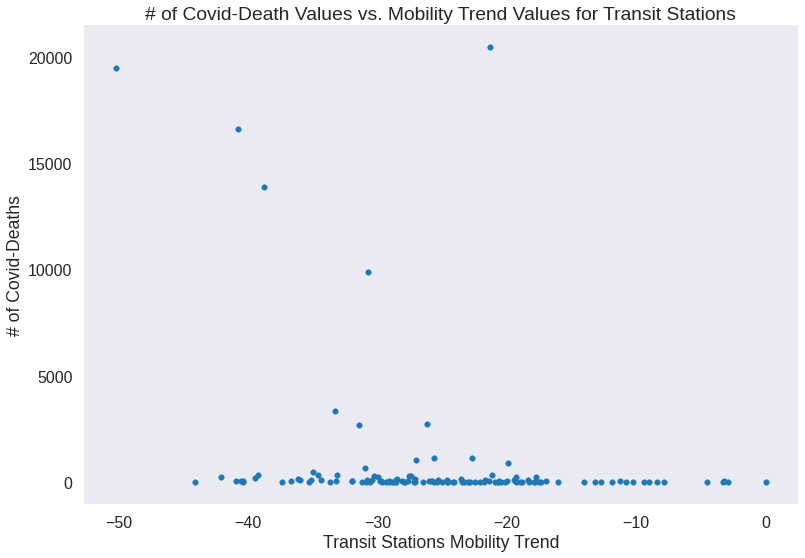

In [0]:
#Python Data Science Handbook, Jake Vanderplas
X = pd.DataFrame(CountryxMobilityxCovidData, columns=['Transit Mobility', 'Covid-Death'])

plt.scatter(X['Transit Mobility'], X['Covid-Death'], s = 30)
plt.xlabel("Transit Stations Mobility Trend")
plt.ylabel("# of Covid-Deaths")
plt.title("# of Covid-Death Values vs. Mobility Trend Values for Transit Stations")
plt.show()

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

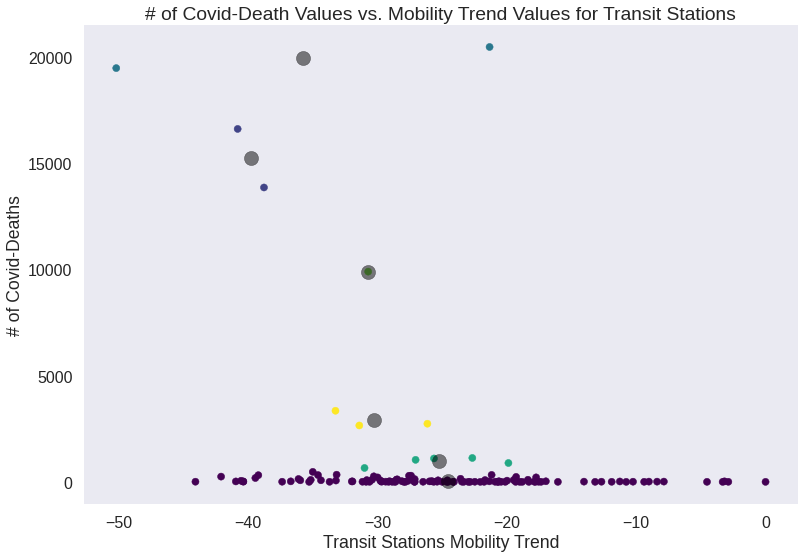

In [0]:
plt.scatter(X['Transit Mobility'], X['Covid-Death'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= 'black', s = 200, alpha= 0.5);
plt.xlabel("Transit Stations Mobility Trend")
plt.ylabel("# of Covid-Deaths")
plt.title("# of Covid-Death Values vs. Mobility Trend Values for Transit Stations")
plt.show()

In [0]:
#Tables by the number of deaths of each group

yellow = CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData ['Covid-Death'] < 1250) & (CountryxMobilityxCovidData['Covid-Death'] > 400)] 

darkGreen = CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData ['Covid-Death'] < 5000) & (CountryxMobilityxCovidData['Covid-Death'] > 1250)] 

green = CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData ['Covid-Death'] < 11000) & (CountryxMobilityxCovidData['Covid-Death'] > 9000) ] 

lightGreen = CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData ['Covid-Death'] < 17000) & (CountryxMobilityxCovidData['Covid-Death'] > 13000) ] 

Blue = CountryxMobilityxCovidData.loc[(CountryxMobilityxCovidData['Covid-Death'] > 17000) ] 

This classification shows us the grouping of countries with similar transit trends and similar deaths.



##Regression

In [0]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
#https://www.programcreek.com/python/example/93975/sklearn.feature_selection.f_regression
#We reasearched how to filter parameters to use in regression and found Feature selection function from sklearn.
#We did not copy any code, learned and tried to use it with our dataframe. Additional examples other than the given links helped us learn how to use it.

def PredictionTool(countryName,predictType):
  DFreg=raw_data.loc[raw_data['COUNTRY_REGION'] == countryName]

  DFreg1 = DFreg[[predictType,'COVID_CONFIRMED','COVID_DEATHS','COVID_WORLD_CONFIRMED','COVID_WORLD_DEATHS','COVID_WORLD_INC_RATE']]
#We get a table for the selected country with chosen columns to predict mobility, we added the world wide case and death stats too for the regression.

#Country has almost random mobility trends when the covid_confirmed column is 0, this can mess up with our predictions so we will get rid of them.
  DFreg2=DFreg1.loc[DFreg1['COVID_DEATHS'] != 0]

  DFreg2=DFreg2.reset_index(drop=True)

  xTRY = DFreg2[['COVID_CONFIRMED','COVID_DEATHS','COVID_WORLD_CONFIRMED','COVID_WORLD_DEATHS','COVID_WORLD_INC_RATE']] #INPUT
  yTRY = DFreg2[predictType] #OUTPUT

#We will use feature selection to filter the parameters
  f_regression(xTRY,yTRY)
  p_values=f_regression(xTRY,yTRY)[1]

#If the P value of a parameter is higher than 0.05 we consider it to be useless in prediction.
  parametersToUse=[]
  possibleParameters=['COVID_CONFIRMED','COVID_DEATHS','COVID_WORLD_CONFIRMED','COVID_WORLD_DEATHS','COVID_WORLD_INC_RATE']

  toBeDeletedParameters=list()
  i=0
  while(i<len(possibleParameters)):
    if(p_values[i]> 0.05):
      toBeDeletedParameters.append(possibleParameters[i])
  
    i=i+1

  for x in toBeDeletedParameters:
  
    possibleParameters.remove(x)

  parametersToUse=possibleParameters
  print("Parameters that are useful for prediction for this country are: ",parametersToUse)

#Now for the prediction part we will seperate the last 5 rows for prediction and checking the success of our predictions.
  last5rows=DFreg2.tail(5)
#and delete that 5 rows from the data
  DFreg2=DFreg2.iloc[:-5]
#Creating Linear Regression with filtered parameters
  xUSE = DFreg2[parametersToUse]
  yUSE =DFreg2[predictType]
  reg=LinearRegression()
  reg.fit(xUSE,yUSE)

  predictionFrame=last5rows[parametersToUse]
  
  prexxx="Predicted "+predictType
  realxxx="Real "+predictType
 #prediction and real values are added to the dataframe 
  predictionFrame.insert(predictionFrame.columns.size, prexxx, reg.predict(predictionFrame), True) 
  predictionFrame.insert(predictionFrame.columns.size-1, realxxx, np.asarray(last5rows[predictType]), True) 
  print()
  print(predictionFrame)
  print()

  predictionsArr=np.asarray(predictionFrame[prexxx])
  realsArr=np.asarray(predictionFrame[realxxx])
#https://www.educative.io/edpresso/calculating-mean-squared-error-in-python
#Calculating mean squared error for predictions.
#We searched a way to measure the success of our predictions, found MSE and further reasearched how to implement it to our project.
#Since this is a formula, we used a source but again did not copy any code.
  errorscoresum=0
  n=len(predictionFrame[prexxx])
  ii=0
  while(ii<n):
    sqrerr=(predictionsArr[ii] - realsArr[ii])**2
    errorscoresum=errorscoresum+sqrerr
    ii=ii+1
  
  MSE=errorscoresum/n
  print("MSE for predictions: ",MSE)





In [0]:
print("Country list for regression function: ",countrynamesForReg)

Country list for regression function:  ['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'Czechia'
 'Denmark' 'Ecuador' 'France' 'Germany' 'India' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Malaysia' 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Poland'
 'Portugal' 'Romania' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom']


To use the PredictionTool you need to choose two parameters. First one is the name of the country.

Second one is going to be "RETAIL_AND_RECREATION_PCT" or "TRANSIT_STATIONS_PCT" depending on what type of mobility prediction you want.

One of the most successful predictions is Turkey.

Only the last day has a big error, and it has a solid reason why. Date of the last prediction is 11.04.2020 and that day Turkey had a full isolation which was started by government.

Our regression can't use parameters like governments approach to this pandemic or people's collective behavior and approach to this pandemic.

It tries to guess their social isolation behaviour from how the pandemic is going by using previous reactions to covid-19 statistics.

Some similiar success in predictions were obtained from: Portugal,Denmark,Sweden,Austria,Czechia,Peru,Poland,Chile and Canada (They don't have a big difference in the last day.)

Switzerland was also a successful prediction until the last day. But in this case Switzerland decreased the social distancing to normalize as a country.

In total 11 countries has successful predictions when compared to others. 11/30 success.

In [0]:
PredictionTool("Turkey","TRANSIT_STATIONS_PCT")

Parameters that are useful for prediction for this country are:  ['COVID_CONFIRMED', 'COVID_DEATHS', 'COVID_WORLD_CONFIRMED', 'COVID_WORLD_DEATHS', 'COVID_WORLD_INC_RATE']

    COVID_CONFIRMED  COVID_DEATHS  COVID_WORLD_CONFIRMED  COVID_WORLD_DEATHS  COVID_WORLD_INC_RATE  Real TRANSIT_STATIONS_PCT  Predicted TRANSIT_STATIONS_PCT
21            34109           725                1395194               81865              5.578060                        -65                      -67.391535
22            38226           812                1480202               88338              6.092916                        -65                      -65.148394
23            42282           908                1563935               95455              5.656863                        -63                      -64.489502
24            47029          1006                1657526              102525              5.984328                        -61                      -60.803663
25            52167          1101    

We failed to predict any value for some countries because none of the possible parameters we chose make the cut from our feature selection process.

If we assume our feature selection process is trustworthy, we can say these countries didn't act according to statistics around the world or in their own country.

Other possible parameters that we don't have and maybe can't be measured such as politics, social rules, collective behaviour defined their mobility trends.

These countries are: Brazil,Israel,Norway and Romania. 4/30 can't be measured.

Rest of the predictions may seem like total failure due to their high MSE values. But we think some of them still might be fair predictions if we consider some facts.

This group has high MSE values with the same reasons: France, Italy, Japan, Malaysia, Spain

The reason this predictions have high MSE values is:

Their statistics are going worse each day and they have really high confirmed and death numbers and they are reacting to it with social distancing, so our regression is predicting they will keep lowering their mobility trend value. Values don't go any lower and the fact is we don't know if it can.

Yes we know the values come from Google's work on mobility trends that they measured and we trusted their measurement.

But we don't know if this values have a threshold, and if they do we don't know a way to apply it to our predictions.

5/30 is not correct in values, but gave the right response to increasing stats.

In [0]:
PredictionTool("France","TRANSIT_STATIONS_PCT")

Parameters that are useful for prediction for this country are:  ['COVID_CONFIRMED', 'COVID_DEATHS', 'COVID_WORLD_CONFIRMED', 'COVID_WORLD_DEATHS', 'COVID_WORLD_INC_RATE']

    COVID_CONFIRMED  COVID_DEATHS  COVID_WORLD_CONFIRMED  COVID_WORLD_DEATHS  COVID_WORLD_INC_RATE  Real TRANSIT_STATIONS_PCT  Predicted TRANSIT_STATIONS_PCT
52            79163         10343                1395194               81865              5.578060                        -80                      -78.066233
53            83057         10887                1480202               88338              6.092916                        -80                     -114.300637
54            87366         12228                1563935               95455              5.656863                        -80                     -109.802590
55            91738         13215                1657526              102525              5.984328                        -81                     -123.754433
56            94863         13851    

Another group that has high MSE values with similiar reasons are: Australia,Belgium,Ecuador and Netherlands

This groups false predictions are similar because they have lower mobility trend values than the predicted ones.

We believe that the reason is they don't have many cases and deaths in their own country so that they don't act according to that stats.

Their government kept social distancing at a max level even though they don't have many deaths and cases. And again this is some behaviour we can't measure.

4/30 social distancing is high even though case and death values are low.

In [0]:
PredictionTool("Ecuador","TRANSIT_STATIONS_PCT")

Parameters that are useful for prediction for this country are:  ['COVID_CONFIRMED', 'COVID_WORLD_CONFIRMED', 'COVID_WORLD_DEATHS']

    COVID_CONFIRMED  COVID_WORLD_CONFIRMED  COVID_WORLD_DEATHS  Real TRANSIT_STATIONS_PCT  Predicted TRANSIT_STATIONS_PCT
24             3747                1395194               81865                        -81                      -55.764582
25             4450                1480202               88338                        -80                      -54.363633
26             4965                1563935               95455                        -79                      -47.424448
27             7161                1657526              102525                        -81                      -61.072850
28             7257                1735650              108502                        -87                      -53.877705

MSE for predictions:  757.0485624761319


Rest of the countries are clearly failed predictions and we couldn't categorize according to any reason.

6/30 clearly failure.